# Project: Wrangling and Analyze Data

In [110]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import urllib.request
import re
from dateutil.parser import parse
from datetime import datetime
%matplotlib inline




## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [111]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
twitter_archive_enhanced = pd.read_csv(url)
twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [112]:
twitter_archive_enhanced.shape

(2356, 17)

In [113]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [114]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [115]:
twitter_archive_enhanced.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [116]:
twitter_archive_enhanced.notnull().sum()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [117]:
twitter_archive_enhanced[twitter_archive_enhanced.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [118]:
twitter_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [119]:
twitter_archive_enhanced.loc[twitter_archive_enhanced.duplicated(subset = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [120]:
twitter_archive_enhanced.loc[twitter_archive_enhanced['in_reply_to_status_id'].notnull()].head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None


In [121]:
twitter_archive_enhanced.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

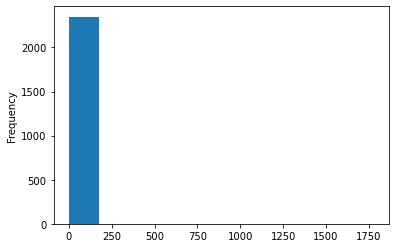

In [122]:
#checking the distribution of the rating numerator column
twitter_archive_enhanced.rating_numerator.plot(kind = 'hist');

In [123]:
#checking rating numerator column greater than 15
twitter_archive_enhanced.loc[twitter_archive_enhanced.rating_numerator > 15].shape

(26, 17)

In [124]:
#checking denominator distribution
twitter_archive_enhanced.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

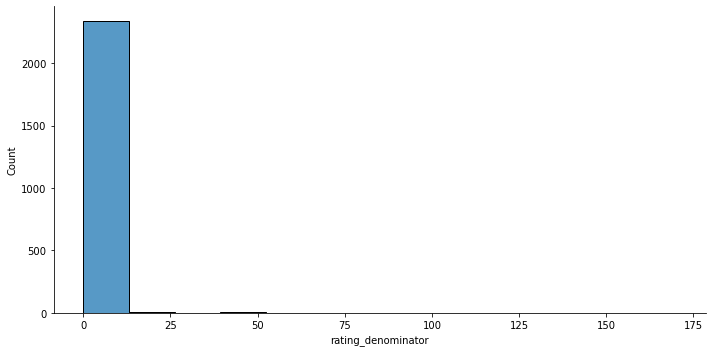

In [125]:
sns.displot(twitter_archive_enhanced.rating_denominator, aspect = 2);

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [126]:
#image_predictions to imported using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
urllib.request.urlretrieve(url, 'image_predictions.tsv')
image_predictions = pd.read_csv('image_predictions.tsv',sep='\t')
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [127]:
image_predictions.shape

(2075, 12)

In [128]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [129]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [130]:
image_predictions.loc[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [131]:
##url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
##tweet_json = pd.read_csv(url)
df_list = []
with open(r'C:\Users\Kakai\Dropbox (Personal)\Python\Udacity\tweet-json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        df_list.append(data)
        
df = []
for dct in df_list:
    id_str = dct.get('id_str')
    retweet_count = dct.get('retweet_count')
    favorite_count = dct.get('favorite_count')
    full_text = dct.get('full_text')
    created_at = dct.get('created_at')
    source = dct.get('source')
    df.append([id_str, retweet_count, favorite_count,full_text,created_at,source])
tweets = pd.DataFrame(df,columns =['id_str','retweet_count','favorite_count','full_text','created_at','source'])
tweets.head(3)

,id_str,retweet_count,favorite_count,full_text,created_at,source
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
1,892177421306343426,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>"


## Assessing Data
This section documents quality and tidiness issues detected in the data while doing both visual assessment and programmatic assessement of the data.

### Quality issues
##### `twitter_archive_enhanced` `tweets` tables
1.Some numerator values were wrongly extracted as per the text field e.g tweet with id #680494726643068929 was extracted as 26/10 yet it should be 11.26/10

2.Timestamp is not in the correct format, to be converted to a timedate format

3.Source column is not clean, contains some html left over special charaters

4.Tweet id extracted from json file has data type object and not integer

5.in_reply_to_user_id/in_reply_to_status_id columns should have int as their data types and not float

6.Some denominator and numerator values need to be transformed to be in the same format as other tweets e.g #677716515794329600 144/120 which should be 12/10

7.rating numerator column has outliers, it has values values as big as 1776

8.rating denominator column has outliers, it should a 10 across all tweets, has values both less than and more than 10


### Tidiness issues
##### `twitter_archive_enhanced` table
1.Source column can be split into two different columns with device and url column being created

2.Retweeted tweets are part of the main dataframe, these needs dropping


## Cleaning Data
This section showcases the cleaning procedures for all the documented quality and tidiness issues. 

In [132]:
twitter_archive_enhanced_cp = twitter_archive_enhanced.copy()
tweets_cp = tweets.copy()
image_predictions_cp = image_predictions.copy()

### Issue #1:

#### Define: Timestamp column is not in a calculatable format, this has to be transformed to a better Year/Month/Day/Hour/Min format

#### Code

In [133]:
twitter_archive_enhanced_cp['new_created_at'] = [parse(d).strftime('%Y-%m-%d::%H-%M') for d in twitter_archive_enhanced_cp.timestamp]
#transforming the newly created column to datetime format
twitter_archive_enhanced_cp['new_created_at'] = pd.to_datetime(twitter_archive_enhanced_cp['new_created_at'], format = '%Y-%m-%d::%H-%M')

#### Test

In [134]:
twitter_archive_enhanced_cp['new_created_at']

0      2017-08-01 16:23:00
1      2017-08-01 00:17:00
2      2017-07-31 00:18:00
3      2017-07-30 15:58:00
4      2017-07-29 16:00:00
               ...        
2351   2015-11-16 00:24:00
2352   2015-11-16 00:04:00
2353   2015-11-15 23:21:00
2354   2015-11-15 23:05:00
2355   2015-11-15 22:32:00
Name: new_created_at, Length: 2356, dtype: datetime64[ns]

### Issue #2:

#### Define: Source column contains two columns, device column will be extracted to create a new column

#### Code

In [135]:
twitter_archive_enhanced_cp['device'] = twitter_archive_enhanced_cp.source.str.split('>', expand = True)[1].str[:-3]

#### Test

In [136]:
twitter_archive_enhanced_cp['device']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: device, Length: 2356, dtype: object

### Issue #3:

#### Define: Source column is not clean, contains some html left over special charaters that can be dropped to retain only the url

#### Code

In [137]:
twitter_archive_enhanced_cp['new_source'] = twitter_archive_enhanced_cp.source.str.split('>', expand = True)[0].str[9:-16]

#### Test

In [138]:
twitter_archive_enhanced_cp['new_source']

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
                       ...                
2351    http://twitter.com/download/iphone
2352    http://twitter.com/download/iphone
2353    http://twitter.com/download/iphone
2354    http://twitter.com/download/iphone
2355    http://twitter.com/download/iphone
Name: new_source, Length: 2356, dtype: object

### Issue #4:

#### Define: in_reply_to_user_id/in_reply_to_status_id columns should have integer as there data types and not float

#### Code

In [139]:
twitter_archive_enhanced_cp['in_reply_to_user_id'] = twitter_archive_enhanced_cp['in_reply_to_user_id'].fillna(0).astype(int, errors = 'ignore')

#### Test

In [140]:
twitter_archive_enhanced_cp['in_reply_to_user_id']

0       0
1       0
2       0
3       0
4       0
       ..
2351    0
2352    0
2353    0
2354    0
2355    0
Name: in_reply_to_user_id, Length: 2356, dtype: int32

### Issue #5:

#### Define: Rating denominator column has outliers, it should a 10 across all tweets, has values both less than and more than 10

#### Code

In [141]:
print(twitter_archive_enhanced_cp.rating_denominator.unique())

twitter_archive_enhanced_cp['rating_denominator'] = twitter_archive_enhanced_cp['rating_denominator'] = 10

[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]


#### Test

In [142]:
twitter_archive_enhanced_cp['rating_denominator'].unique()
print(twitter_archive_enhanced_cp.rating_denominator.unique())

[10]


### Issue #6:

#### Define: tweet_id column extracted has the name id_str, this has to be renamed for uniformity

#### Code

In [143]:
tweets_cp.rename(columns = {'id_str':'tweet_id'}, inplace = True)
tweets_cp['tweet_id'] = tweets_cp.tweet_id.astype(np.int64)

#### Test

In [144]:
tweets_cp.tweet_id

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: tweet_id, Length: 2354, dtype: int64

#### Define: Tweet id extracted from json file has data type object and not integer

#### Code

### Issue #7 & #8:

#### Define: Some numerator values were wrongly extracted as per the text field e.g tweet with id #680494726643068929 was extracted as 26/10 yet it should be 11.26/10
#### Define: Some denominator and numerator values need to be transformed to be in the same format as other tweets e.g #677716515794329600 144/120 which shoild be 12/10

#### Code

In [145]:
#tweet_ids with rating numerator column that needs transforming/rectifying
tweet_id = [677716515794329600,675853064436391936,682808988178739200,713900603437621249,810984652412424192,758467244762497024,731156023742988288,716439118184652801,710658690886586372,680494726643068929,684222868335505415,684225744407494656,
697463031882764288,704054845121142784,709198395643068416,680494726643068929,786709082849828864,778027034220126208,832215909146226688,881633300179243008]
#transformed rating columns for the tweets
rating = ['12/10','11/10','12.5/10','11/10','12/10','11/10','12/10','11/10','10/10','12.5/10','11/10','11/10','11/10','12/10','9/10','11.26/10','9.75/10','11.27/10','9.75/10','13/10']

df = pd.DataFrame(tweet_id,rating).reset_index().rename(columns = {0:'tweet_id','index':'rating'})
df['numerator'] = df['rating'].str.split('/').str[0]
df['numerator'] = pd.to_numeric(df['numerator'], downcast = 'float')
df.drop(columns = ['rating'], axis = 1, inplace = True)
#merging the new dataframe with twitter_archive_enhanced_cp
twitter_archive_enhanced_cp = twitter_archive_enhanced_cp.merge(df, how='left', on = 'tweet_id')

In [146]:
twitter_archive_enhanced_cp['rating_numerator'] = twitter_archive_enhanced_cp['rating_numerator'].astype('float')
#replacing original values with dataset with transformed rating values
twitter_archive_enhanced_cp.loc[twitter_archive_enhanced_cp['numerator'].notnull(), 'rating_numerator'] = twitter_archive_enhanced_cp['numerator']
twitter_archive_enhanced_cp.drop(columns = ['numerator'], axis = 1, inplace = True)

### Issue #9:

#### Define: Rating numerator column has outliers, it has values values as big as 1776

#### Code

In [147]:
twitter_archive_enhanced_cp_iqr = twitter_archive_enhanced_cp[['rating_numerator']]
Q1 = twitter_archive_enhanced_cp_iqr.quantile(0.25)
Q3 = twitter_archive_enhanced_cp_iqr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
twitter_archive_enhanced_cp_iqr_clean = twitter_archive_enhanced_cp_iqr[~((twitter_archive_enhanced_cp_iqr < (Q1 - 1.5 * IQR)) | (twitter_archive_enhanced_cp_iqr > (Q3 + 1.5 * IQR))).any(axis=1)]
twitter_archive_enhanced_cp_iqr_clean

rating_numerator    2.0
dtype: float64


,rating_numerator
0,13.0
1,13.0
2,12.0
3,13.0
4,12.0
...,...
2349,10.0
2351,10.0
2354,9.0
2355,7.0


#### Test

In [148]:
twitter_archive_enhanced_cp['rating_numerator'] = twitter_archive_enhanced_cp_iqr_clean
twitter_archive_enhanced_cp['rating_numerator'].unique()

array([13.        , 12.        , 14.        ,         nan, 11.        ,
       10.        , 15.        ,  9.75      ,  7.        ,  9.        ,
        8.        , 11.27000046, 12.5       , 11.26000023])

### Issue #10:

#### Define: Retweeted tweets are part of the main dataframe Retweeted tweets are part of the main dataframe, these cases need to be dropped

#### Code

In [149]:
print(twitter_archive_enhanced_cp.loc[twitter_archive_enhanced_cp.text.str[:2] == 'RT'].shape)
retweets = twitter_archive_enhanced_cp.loc[twitter_archive_enhanced_cp.text.str[:2] == 'RT']

print(twitter_archive_enhanced_cp.shape)

for index in retweets.index:
    twitter_archive_enhanced_cp.drop(index,axis = 0, inplace = True)

(183, 20)
(2357, 20)


#### Test

In [150]:
twitter_archive_enhanced_cp.shape

(2174, 20)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [151]:
twitter_archive_master = twitter_archive_enhanced_cp.merge( tweets_cp, on = 'tweet_id').merge(image_predictions_cp, on = 'tweet_id')

In [152]:
twitter_archive_master.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,0,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,0,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,0,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [153]:
twitter_archive_master.shape

(1994, 36)

In [154]:
twitter_archive_master.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'new_created_at', 'device', 'new_source', 'retweet_count',
       'favorite_count', 'full_text', 'created_at', 'source_y', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

## Analyzing and Visualizing Data

In [155]:
devicedistribution = twitter_archive_master.groupby('device')['tweet_id'].count().reset_index().rename(columns = {'tweet_id':'Count'})
print(devicedistribution)

               device  Count
0           TweetDeck     11
1  Twitter Web Client     28
2  Twitter for iPhone   1955


In [ ]:
twitter_archive_master,

### Insights:
1.Almost all of the tweets were tweeted using an Iphone. Tweeter for Iphone account for 98.04% of the tweets with the remaining less that 2% being shared by TweetDeck and Twitter Web Client

2.There is a positive correlation between retweet counts and favorite counts, for a tweet with high number of retweets the tweets will equally get high number of favorites and vice versa is true

3.Dogs with low rating received low retweet and favorite counts as compared to dogs with higher rating. Majority of the dogs were rated between 12 and 14 while low rated had a 7. 

### Visualization

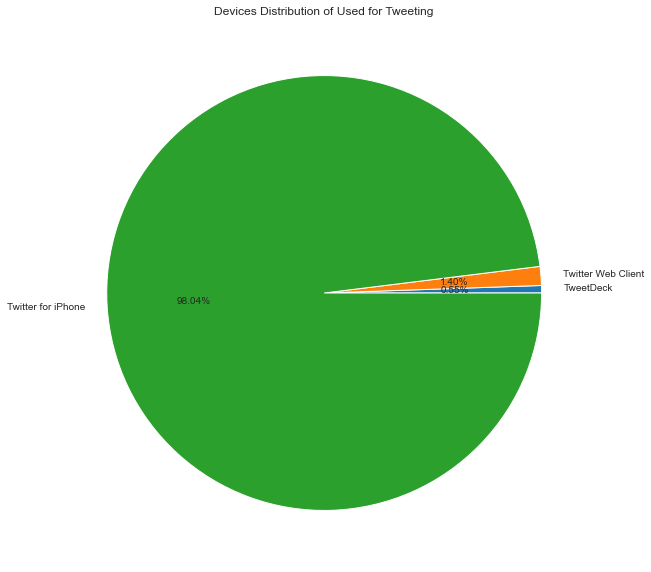

In [156]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(10,10))
plt.pie(data = devicedistribution, x = devicedistribution['Count'], labels = devicedistribution['device'],  autopct='%1.2f%%')
plt.title("Devices Distribution of Used for Tweeting")
plt.show();

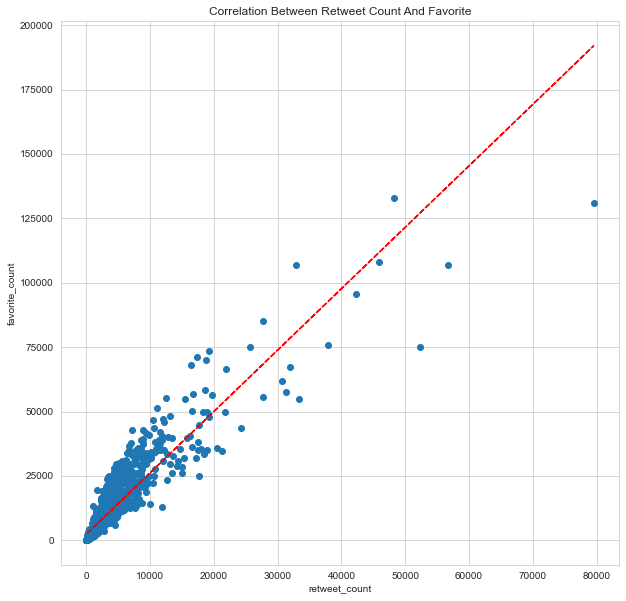

In [158]:
fig = plt.figure(figsize=(10,10))
plt.scatter('retweet_count', 'favorite_count', data=twitter_archive_master)
#Adding the aesthetics
plt.title('Correlation Between Retweet Count And Favorite')
plt.xlabel('retweet_count')
plt.ylabel('favorite_count') 
#Show the plot
z = np.polyfit(twitter_archive_master['retweet_count'], twitter_archive_master['favorite_count'], 1)
p = np.poly1d(z)
plt.plot(twitter_archive_master['retweet_count'],p(twitter_archive_master['retweet_count']),"r--")
plt.show()

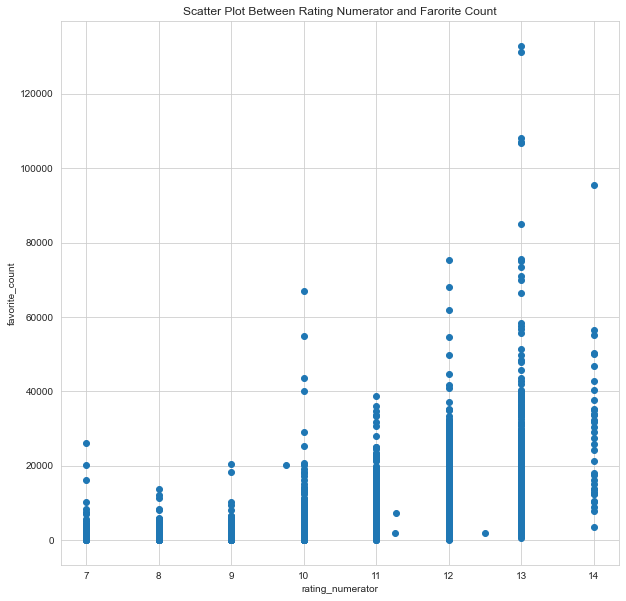

In [159]:
fig = plt.figure(figsize=(10,10))
plt.scatter('rating_numerator', 'favorite_count', data=twitter_archive_master)
#Adding the aesthetics
plt.title('Scatter Plot Between Rating Numerator and Farorite Count')
plt.xlabel('rating_numerator')
plt.ylabel('favorite_count') 
#Show the plot
plt.show()